## Import Data

In [1]:
import datetime as dt
from pathlib import Path
from pytz import timezone

import pandas as pd
import numpy as np
import os
import glob
import geopandas as gpd
from shapely import geometry, ops
import matplotlib.pyplot as plt
from matplotlib import pyplot
import plotly.graph_objects as go
from h3 import h3
import leafmap.kepler as leafmap


In [2]:
# Combine data from 2020 to 2022

os.chdir('/Users/yarongchen/Documents/UI_PhD/2_Spring_2022/geo_programming_final_project/Geo_Programming_Project/Data/2020_2021_2022')
# get all data files and combine as one 
path =os.getcwd()
filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

# Concatenate all data into one DataFrame
comb_df_20_21_22 = pd.concat(dfs, ignore_index=True)
print(comb_df_20_21_22.shape)
comb_df_20_21_22.head(5)

(27282580, 22)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,member_casual,month,year,dayofweek,dayofmonth,duration_minutes,geometry,h3_index,lat,lng
0,BD0A6FF6FFF9B921,electric_bike,2020-11-01 13:36:00,2020-11-01 13:45:40,Dearborn St & Erie St,110.0,St. Clair St & Erie St,211.0,41.894177,-87.629127,...,casual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,96A7A7A4BDE4F82D,electric_bike,2020-11-01 10:03:26,2020-11-01 10:14:45,Franklin St & Illinois St,672.0,Noble St & Milwaukee Ave,29.0,41.890959,-87.635343,...,casual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C61526D06582BDC5,electric_bike,2020-11-01 00:34:05,2020-11-01 01:03:06,Lake Shore Dr & Monroe St,76.0,Federal St & Polk St,41.0,41.880983,-87.616754,...,casual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E533E89C32080B9E,electric_bike,2020-11-01 00:45:16,2020-11-01 00:54:31,Leavitt St & Chicago Ave,659.0,Stave St & Armitage Ave,185.0,41.895499,-87.682013,...,casual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1C9F4EF18C168C60,electric_bike,2020-11-01 15:43:25,2020-11-01 16:16:52,Buckingham Fountain,2.0,Buckingham Fountain,2.0,41.876497,-87.620358,...,casual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Combine Data 2019
os.chdir('/Users/yarongchen/Documents/UI_PhD/2_Spring_2022/geo_programming_final_project/Geo_Programming_Project/Data/2019')
# get all data files and combine as one 
path =os.getcwd()
filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

# Concatenate all data into one DataFrame
comb_df_19 = pd.concat(dfs, ignore_index=True)
print(comb_df_19.shape)
comb_df_19.head(5)

(37253960, 34)


,start_station_name,h3_index,lat,lng,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,...,start_lng,end_lat,end_lng,member_casual,month,year,dayofweek,dayofmonth,duration_minutes,geometry
0,Wabash Ave & 83rd St,882664cce1fffff,41.745328,-87.606885,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Central Ave & Harrison St,882664c83bfffff,41.872421,-87.762670,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Western Ave & 111th St,8826645753fffff,41.688382,-87.678241,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Central Ave & Harrison St,882664caa5fffff,41.883284,-87.726471,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Clyde Ave & 87th St,8826641b35fffff,41.702642,-87.526337,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
comb_df_19_q2 = pd.read_csv("/Users/yarongchen/Documents/UI_PhD/2_Spring_2022/geo_programming_final_project/Geo_Programming_Project/Data/Divvy_Trips_2019_Q2.csv")
comb_df_19_q2.rename(columns = {'01 - Rental Details Rental ID':'trip_id' , 
                                                '01 - Rental Details Local Start Time': 'start_time',
                                                '01 - Rental Details Local End Time': 'end_time',
                                                '01 - Rental Details Bike ID': 'bikeid' ,
                                                '01 - Rental Details Duration In Seconds Uncapped': 'tripduration', 
                                                '03 - Rental Start Station ID': 'from_station_id', 
                                                '03 - Rental Start Station Name': 'from_station_name',
                                                '02 - Rental End Station ID': 'to_station_id', 
                                                '02 - Rental End Station Name': 'to_station_name',
                                                'User Type': 'usertype', 
                                                'Member Gender': 'gender',
                                                '05 - Member Details Member Birthday Year': 'birthyear'}, inplace = True)
print(comb_df_19_q2.shape)
comb_df_19_q2          

(1108163, 12)


,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,446.0,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber,Male,1975.0
1,22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,"1,048.0",317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber,Female,1984.0
2,22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,252.0,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber,Male,1990.0
3,22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,357.0,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,Subscriber,Male,1993.0
4,22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,"1,007.0",202,Halsted St & 18th St,129,Blue Island Ave & 18th St,Subscriber,Male,1992.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1108158,23479383,2019-06-30 23:58:00,2019-07-01 00:20:22,4573,"1,342.0",206,Halsted St & Archer Ave,206,Halsted St & Archer Ave,Customer,NaN,NaN
1108159,23479384,2019-06-30 23:58:04,2019-07-01 00:14:17,6301,973.0,199,Wabash Ave & Grand Ave,338,Calumet Ave & 18th St,Subscriber,Male,1980.0
1108160,23479385,2019-06-30 23:58:20,2019-07-01 00:25:51,4472,"1,651.0",319,Greenview Ave & Diversey Pkwy,337,Clark St & Chicago Ave,Subscriber,Female,1991.0
1108161,23479386,2019-06-30 23:58:52,2019-07-01 00:11:24,5021,752.0,226,Racine Ave & Belmont Ave,300,Broadway & Barry Ave,Subscriber,Male,1992.0


In [ ]:
comb_df_19_q2.columns

Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear'],
      dtype='object')

In [ ]:
comb_df_19.columns

Index(['start_station_name', 'h3_index', 'lat', 'lng', 'trip_id', 'start_time',
       'end_time', 'bikeid', 'tripduration', 'from_station_id',
       'from_station_name', 'to_station_id', 'to_station_name', 'usertype',
       'gender', 'birthyear', 'ride_id', 'rideable_type', 'started_at',
       'ended_at', 'start_station_id', 'end_station_name', 'end_station_id',
       'start_lat', 'start_lng', 'end_lat', 'end_lng', 'member_casual',
       'month', 'year', 'dayofweek', 'dayofmonth', 'duration_minutes',
       'geometry'],
      dtype='object')

In [ ]:
# combine two dataframes as one 
frames = [comb_df_19_q2, comb_df_19]
comb_df_19 = pd.concat(frames)
print(comb_df_19.shape)
comb_df_19.head(10)

(38362123, 34)


,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,...,start_lng,end_lat,end_lng,member_casual,month,year,dayofweek,dayofmonth,duration_minutes,geometry
0,22178529.0,2019-04-01 00:02:22,2019-04-01 00:09:48,6251.0,446.0,81.0,Daley Center Plaza,56.0,Desplaines St & Kinzie St,Subscriber,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22178530.0,2019-04-01 00:03:02,2019-04-01 00:20:30,6226.0,"1,048.0",317.0,Wood St & Taylor St,59.0,Wabash Ave & Roosevelt Rd,Subscriber,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,22178531.0,2019-04-01 00:11:07,2019-04-01 00:15:19,5649.0,252.0,283.0,LaSalle St & Jackson Blvd,174.0,Canal St & Madison St,Subscriber,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22178532.0,2019-04-01 00:13:01,2019-04-01 00:18:58,4151.0,357.0,26.0,McClurg Ct & Illinois St,133.0,Kingsbury St & Kinzie St,Subscriber,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,22178533.0,2019-04-01 00:19:26,2019-04-01 00:36:13,3270.0,"1,007.0",202.0,Halsted St & 18th St,129.0,Blue Island Ave & 18th St,Subscriber,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,22178534.0,2019-04-01 00:19:39,2019-04-01 00:23:56,3123.0,257.0,420.0,Ellis Ave & 55th St,426.0,Ellis Ave & 60th St,Subscriber,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,22178535.0,2019-04-01 00:26:33,2019-04-01 00:35:41,6418.0,548.0,503.0,Drake Ave & Fullerton Ave,500.0,Central Park Ave & Elbridge Ave,Subscriber,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,22178536.0,2019-04-01 00:29:48,2019-04-01 00:36:11,4513.0,383.0,260.0,Kedzie Ave & Milwaukee Ave,499.0,Kosciuszko Park,Subscriber,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,22178537.0,2019-04-01 00:32:07,2019-04-01 01:07:44,3280.0,"2,137.0",211.0,St. Clair St & Erie St,211.0,St. Clair St & Erie St,Customer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,22178538.0,2019-04-01 00:32:19,2019-04-01 01:07:39,5534.0,"2,120.0",211.0,St. Clair St & Erie St,211.0,St. Clair St & Erie St,Customer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# check unique bike type
comb_df_20_21_22.rideable_type.unique()

array(['electric_bike', 'docked_bike', 'classic_bike'], dtype=object)

In [ ]:
# check start_stattion)name type
print("start_station_name", comb_df_20_21_22.start_station_name.nunique())
print("end_station_name", comb_df_20_21_22.end_station_name.nunique())

start_station_name 895
end_station_name 894


In [ ]:
# check membership type
comb_df_20_21_22.member_casual.unique()

array(['casual', 'member'], dtype=object)

In [ ]:
# check unique bike type
comb_df_20_21_22.rideable_type.unique()

array(['electric_bike', 'docked_bike', 'classic_bike'], dtype=object)

In [ ]:
# check unique bike dock stations 
print("start_station", comb_df_20_21_22['start_station_id'].nunique())
print("end_station", comb_df_20_21_22['end_station_id'].nunique())

start_station 2574
end_station 2175


In [ ]:
 # convert the Start Time column to datetime  >>> then convert to month & year & day of week
comb_df_20_21_22['month'] = pd.to_datetime(comb_df_20_21_22['started_at']).dt.month
comb_df_20_21_22['year'] = pd.to_datetime(comb_df_20_21_22['started_at']).dt.year
comb_df_20_21_22['dayofweek'] = pd.to_datetime(comb_df_20_21_22['started_at']).dt.weekday
comb_df_20_21_22['dayofmonth'] = pd.to_datetime(comb_df_20_21_22['started_at']).dt.day

comb_df_20_21_22['started_at'] = pd.to_datetime(comb_df_20_21_22['started_at'])
comb_df_20_21_22['ended_at'] = pd.to_datetime(comb_df_20_21_22['ended_at'])
comb_df_20_21_22['duration_minutes'] = ((comb_df_20_21_22['ended_at'] - comb_df_20_21_22['started_at']).astype('timedelta64[s]'))/60

In [ ]:
comb_df_20_21_22.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,member_casual,month,year,dayofweek,dayofmonth,duration_minutes,geometry,h3_index,lat,lng
0,BD0A6FF6FFF9B921,electric_bike,2020-11-01 13:36:00,2020-11-01 13:45:40,Dearborn St & Erie St,110.0,St. Clair St & Erie St,211.0,41.894177,-87.629127,...,casual,11,2020,6,1,9.666667,NaN,NaN,NaN,NaN
1,96A7A7A4BDE4F82D,electric_bike,2020-11-01 10:03:26,2020-11-01 10:14:45,Franklin St & Illinois St,672.0,Noble St & Milwaukee Ave,29.0,41.890959,-87.635343,...,casual,11,2020,6,1,11.316667,NaN,NaN,NaN,NaN
2,C61526D06582BDC5,electric_bike,2020-11-01 00:34:05,2020-11-01 01:03:06,Lake Shore Dr & Monroe St,76.0,Federal St & Polk St,41.0,41.880983,-87.616754,...,casual,11,2020,6,1,29.016667,NaN,NaN,NaN,NaN
3,E533E89C32080B9E,electric_bike,2020-11-01 00:45:16,2020-11-01 00:54:31,Leavitt St & Chicago Ave,659.0,Stave St & Armitage Ave,185.0,41.895499,-87.682013,...,casual,11,2020,6,1,9.250000,NaN,NaN,NaN,NaN
4,1C9F4EF18C168C60,electric_bike,2020-11-01 15:43:25,2020-11-01 16:16:52,Buckingham Fountain,2.0,Buckingham Fountain,2.0,41.876497,-87.620358,...,casual,11,2020,6,1,33.450000,NaN,NaN,NaN,NaN


In [ ]:
comb_df_20_21_22.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
month                          int64
year                           int64
dayofweek                      int64
dayofmonth                     int64
duration_minutes             float64
geometry                      object
h3_index                      object
lat                          float64
lng                          float64
dtype: object

In [ ]:
# drop null value columns
comb_df_20_21_22 = comb_df_20_21_22.dropna()
comb_df_20_21_22.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
month                 0
year                  0
dayofweek             0
dayofmonth            0
duration_minutes      0
geometry              0
h3_index              0
lat                   0
lng                   0
dtype: int64

In [ ]:
comb_df_20_21_22.shape

(17271164, 22)

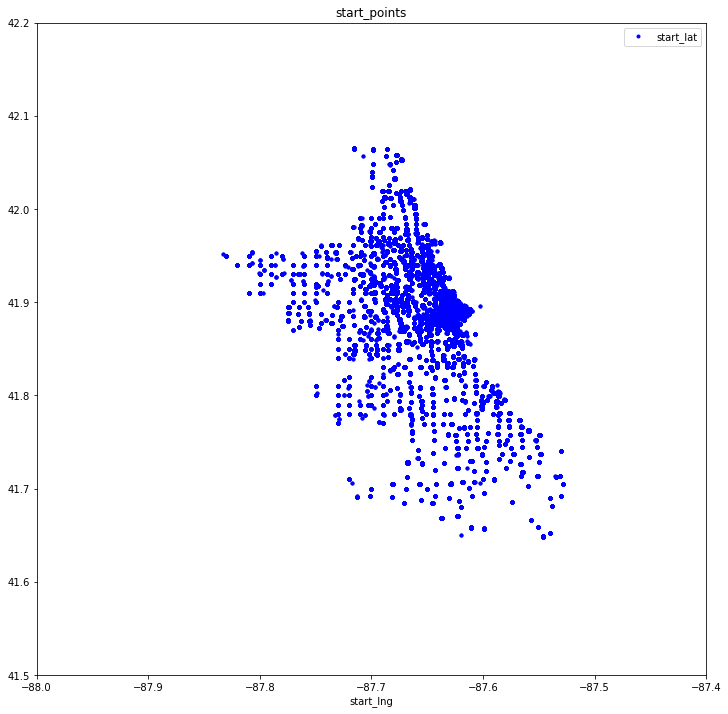

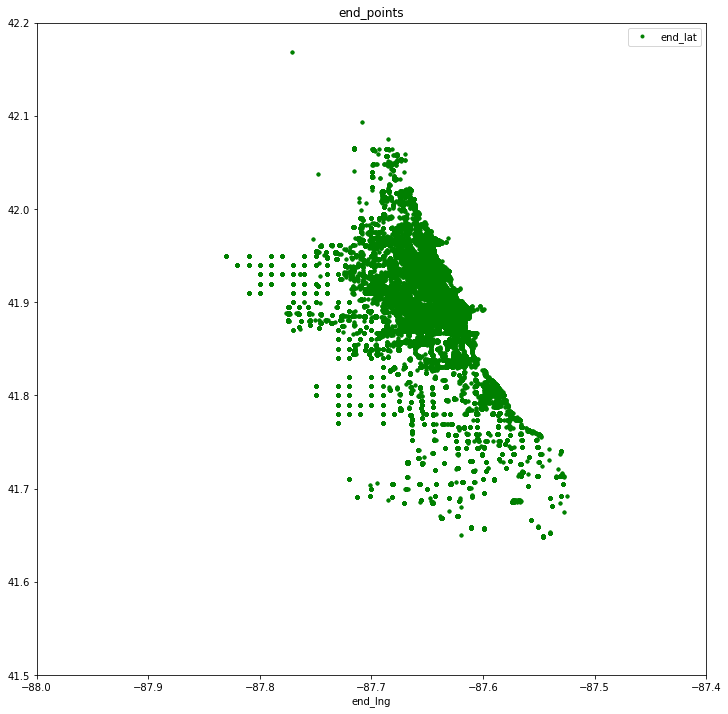

In [ ]:
# Visualize the start points
comb_df_20_21_22.plot(x='start_lng',y='start_lat',style='.', color = 'b', alpha=1,figsize=(12,12))
plt.title('start_points')
plt.axis((-88,-87.4,41.5,42.2))

comb_df_20_21_22.plot(x='end_lng',y='end_lat',style='.',color='g', alpha=1,figsize=(12,12));
plt.title('end_points')
plt.axis((-88,-87.4,41.5,42.2))

plt.show()

#### Findings:
the ending points are more dispersed compared with starting points

## Convert to GeoDataFrame with geometry

In [ ]:
import geopandas
geopandas.__version__

'0.10.2'

In [ ]:
gdf_start_20_21_22 = gpd.GeoDataFrame(comb_df_20_21_22, geometry=gpd.points_from_xy(comb_df_20_21_22.start_lng, comb_df_20_21_22.start_lat))
gdf_start_20_21_22.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,member_casual,month,year,dayofweek,dayofmonth,duration_minutes,geometry,h3_index,lat,lng
259716,BD0A6FF6FFF9B921,electric_bike,2020-11-01 13:36:00,2020-11-01 13:45:40,Dearborn St & Erie St,110.0,St. Clair St & Erie St,211.0,41.894177,-87.629127,...,casual,11,2020,6,1,9.666667,POINT (-87.62913 41.89418),882664c1e1fffff,41.895400,-87.626394
259717,96A7A7A4BDE4F82D,electric_bike,2020-11-01 10:03:26,2020-11-01 10:14:45,Franklin St & Illinois St,672.0,Noble St & Milwaukee Ave,29.0,41.890959,-87.635343,...,casual,11,2020,6,1,11.316667,POINT (-87.63534 41.89096),882664caddfffff,41.898523,-87.660699
259718,C61526D06582BDC5,electric_bike,2020-11-01 00:34:05,2020-11-01 01:03:06,Lake Shore Dr & Monroe St,76.0,Federal St & Polk St,41.0,41.880983,-87.616754,...,casual,11,2020,6,1,29.016667,POINT (-87.61675 41.88098),882664c1a3fffff,41.867490,-87.630287
259719,E533E89C32080B9E,electric_bike,2020-11-01 00:45:16,2020-11-01 00:54:31,Leavitt St & Chicago Ave,659.0,Stave St & Armitage Ave,185.0,41.895499,-87.682013,...,casual,11,2020,6,1,9.250000,POINT (-87.68201 41.89550),882664ca13fffff,41.915594,-87.693078
259720,1C9F4EF18C168C60,electric_bike,2020-11-01 15:43:25,2020-11-01 16:16:52,Buckingham Fountain,2.0,Buckingham Fountain,2.0,41.876497,-87.620358,...,casual,11,2020,6,1,33.450000,POINT (-87.62036 41.87650),882664c1abfffff,41.873946,-87.623599


In [ ]:
gdf_end = gpd.GeoDataFrame(comb_df_20_21_22, geometry=gpd.points_from_xy(comb_df_20_21_22.end_lng, comb_df_20_21_22.end_lat))
gdf_end.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,member_casual,month,year,dayofweek,dayofmonth,duration_minutes,geometry,h3_index,lat,lng
259716,BD0A6FF6FFF9B921,electric_bike,2020-11-01 13:36:00,2020-11-01 13:45:40,Dearborn St & Erie St,110.0,St. Clair St & Erie St,211.0,41.894177,-87.629127,...,casual,11,2020,6,1,9.666667,POINT (-87.62338 41.89443),882664c1e1fffff,41.895400,-87.626394
259717,96A7A7A4BDE4F82D,electric_bike,2020-11-01 10:03:26,2020-11-01 10:14:45,Franklin St & Illinois St,672.0,Noble St & Milwaukee Ave,29.0,41.890959,-87.635343,...,casual,11,2020,6,1,11.316667,POINT (-87.66248 41.90067),882664caddfffff,41.898523,-87.660699
259718,C61526D06582BDC5,electric_bike,2020-11-01 00:34:05,2020-11-01 01:03:06,Lake Shore Dr & Monroe St,76.0,Federal St & Polk St,41.0,41.880983,-87.616754,...,casual,11,2020,6,1,29.016667,POINT (-87.62955 41.87205),882664c1a3fffff,41.867490,-87.630287
259719,E533E89C32080B9E,electric_bike,2020-11-01 00:45:16,2020-11-01 00:54:31,Leavitt St & Chicago Ave,659.0,Stave St & Armitage Ave,185.0,41.895499,-87.682013,...,casual,11,2020,6,1,9.250000,POINT (-87.69139 41.91774),882664ca13fffff,41.915594,-87.693078
259720,1C9F4EF18C168C60,electric_bike,2020-11-01 15:43:25,2020-11-01 16:16:52,Buckingham Fountain,2.0,Buckingham Fountain,2.0,41.876497,-87.620358,...,casual,11,2020,6,1,33.450000,POINT (-87.62034 41.87645),882664c1abfffff,41.873946,-87.623599


## Convert the Point Layer to Hexagon

Converting a point layer to H3 is quite straightforward, as binning into hexagon cells is H3's core functionality. This tutorial demonstrates how to extend basic binning with buffering operations.

In [ ]:
# view H3 index resolutions
max_res = 15
list_hex_edge_km = []
list_hex_edge_m = []
list_hex_perimeter_km = []
list_hex_perimeter_m = []
list_hex_area_sqkm = []
list_hex_area_sqm = []

for i in range(0, max_res + 1):
    ekm = h3.edge_length(resolution=i, unit='km')
    em = h3.edge_length(resolution=i, unit='m')
    list_hex_edge_km.append(round(ekm, 3))
    list_hex_edge_m.append(round(em, 3))
    list_hex_perimeter_km.append(round(6 * ekm, 3))
    list_hex_perimeter_m.append(round(6 * em, 3))

    akm = h3.hex_area(resolution=i, unit='km^2')
    am = h3.hex_area(resolution=i, unit='m^2')
    list_hex_area_sqkm.append(round(akm, 3))
    list_hex_area_sqm.append(round(am, 3))

df_meta = pd.DataFrame({"edge_length_km": list_hex_edge_km,
                        "perimeter_km": list_hex_perimeter_km,
                        "area_sqkm": list_hex_area_sqkm,
                        "edge_length_m": list_hex_edge_m,
                        "perimeter_m": list_hex_perimeter_m,
                        "area_sqm": list_hex_area_sqm
                        })

df_meta[["edge_length_km", "perimeter_km", "area_sqkm", 
         "edge_length_m", "perimeter_m", "area_sqm"]]

,edge_length_km,perimeter_km,area_sqkm,edge_length_m,perimeter_m,area_sqm
0,1107.713,6646.276,4250546.848,1107712.591,6646275.546,4.250547e+12
1,418.676,2512.056,607220.978,418676.005,2512056.033,6.072210e+11
2,158.245,949.468,86745.854,158244.656,949467.935,8.674585e+10
3,59.811,358.865,12392.265,59810.858,358865.148,1.239226e+10
4,22.606,135.638,1770.324,22606.379,135638.276,1.770324e+09
5,8.544,51.266,252.903,8544.408,51266.450,2.529034e+08
6,3.229,19.377,36.129,3229.483,19376.897,3.612905e+07
7,1.221,7.324,5.161,1220.630,7323.779,5.161293e+06
8,0.461,2.768,0.737,461.355,2768.128,7.373276e+05
9,0.174,1.046,0.105,174.376,1046.254,1.053325e+05


In [ ]:
h3_level = 5
 
def lat_lng_to_h3(row):
    return h3.geo_to_h3(
      row.geometry.y, row.geometry.x, h3_level)

# convert points to hexagon 
gdf_start_20_21_22['h3_index'] = gdf_start_20_21_22.apply(lat_lng_to_h3, axis=1)

#find center of hex for visualization
gdf_start_20_21_22['lat'] = gdf_start_20_21_22['h3_index'].apply(lambda x: h3.h3_to_geo(x)[0])
gdf_start_20_21_22['lng'] = gdf_start_20_21_22['h3_index'].apply(lambda x: h3.h3_to_geo(x)[1])

gdf_start_20_21_22.head(5)



,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,member_casual,month,year,dayofweek,dayofmonth,duration_minutes,geometry,h3_index,lat,lng
259716,BD0A6FF6FFF9B921,electric_bike,2020-11-01 13:36:00,2020-11-01 13:45:40,Dearborn St & Erie St,110.0,St. Clair St & Erie St,211.0,41.894177,-87.629127,...,casual,11,2020,6,1,9.666667,POINT (-87.62338 41.89443),852664c3fffffff,41.924549,-87.558586
259717,96A7A7A4BDE4F82D,electric_bike,2020-11-01 10:03:26,2020-11-01 10:14:45,Franklin St & Illinois St,672.0,Noble St & Milwaukee Ave,29.0,41.890959,-87.635343,...,casual,11,2020,6,1,11.316667,POINT (-87.66248 41.90067),852664cbfffffff,41.893868,-87.765528
259718,C61526D06582BDC5,electric_bike,2020-11-01 00:34:05,2020-11-01 01:03:06,Lake Shore Dr & Monroe St,76.0,Federal St & Polk St,41.0,41.880983,-87.616754,...,casual,11,2020,6,1,29.016667,POINT (-87.62955 41.87205),852664c3fffffff,41.924549,-87.558586
259719,E533E89C32080B9E,electric_bike,2020-11-01 00:45:16,2020-11-01 00:54:31,Leavitt St & Chicago Ave,659.0,Stave St & Armitage Ave,185.0,41.895499,-87.682013,...,casual,11,2020,6,1,9.250000,POINT (-87.69139 41.91774),852664cbfffffff,41.893868,-87.765528
259720,1C9F4EF18C168C60,electric_bike,2020-11-01 15:43:25,2020-11-01 16:16:52,Buckingham Fountain,2.0,Buckingham Fountain,2.0,41.876497,-87.620358,...,casual,11,2020,6,1,33.450000,POINT (-87.62034 41.87645),852664c3fffffff,41.924549,-87.558586


In [ ]:
# convert points to hexagon 
gdf_end['h3_index'] = gdf_end.apply(lat_lng_to_h3, axis=1)

#find center of hex for visualization
gdf_end['lat'] = gdf_end['h3_index'].apply(lambda x: h3.h3_to_geo(x)[0])
gdf_end['lng'] = gdf_end['h3_index'].apply(lambda x: h3.h3_to_geo(x)[1])

gdf_end.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,member_casual,month,year,dayofweek,dayofmonth,duration_minutes,geometry,h3_index,lat,lng
259716,BD0A6FF6FFF9B921,electric_bike,2020-11-01 13:36:00,2020-11-01 13:45:40,Dearborn St & Erie St,110.0,St. Clair St & Erie St,211.0,41.894177,-87.629127,...,casual,11,2020,6,1,9.666667,POINT (-87.62338 41.89443),852664c3fffffff,41.924549,-87.558586
259717,96A7A7A4BDE4F82D,electric_bike,2020-11-01 10:03:26,2020-11-01 10:14:45,Franklin St & Illinois St,672.0,Noble St & Milwaukee Ave,29.0,41.890959,-87.635343,...,casual,11,2020,6,1,11.316667,POINT (-87.66248 41.90067),852664cbfffffff,41.893868,-87.765528
259718,C61526D06582BDC5,electric_bike,2020-11-01 00:34:05,2020-11-01 01:03:06,Lake Shore Dr & Monroe St,76.0,Federal St & Polk St,41.0,41.880983,-87.616754,...,casual,11,2020,6,1,29.016667,POINT (-87.62955 41.87205),852664c3fffffff,41.924549,-87.558586
259719,E533E89C32080B9E,electric_bike,2020-11-01 00:45:16,2020-11-01 00:54:31,Leavitt St & Chicago Ave,659.0,Stave St & Armitage Ave,185.0,41.895499,-87.682013,...,casual,11,2020,6,1,9.250000,POINT (-87.69139 41.91774),852664cbfffffff,41.893868,-87.765528
259720,1C9F4EF18C168C60,electric_bike,2020-11-01 15:43:25,2020-11-01 16:16:52,Buckingham Fountain,2.0,Buckingham Fountain,2.0,41.876497,-87.620358,...,casual,11,2020,6,1,33.450000,POINT (-87.62034 41.87645),852664c3fffffff,41.924549,-87.558586


In [ ]:
path = '/Users/yarongchen/Documents/UI_PhD/2_Spring_2022/geo_programming_final_project/Geo_Programming_Project/Data'
gdf_start_20_21_22.to_csv("gdf_start_5.csv",index=False,mode='w')
gdf_end.to_csv("gdf_end_5.csv", index=False,mode='w')

In [ ]:
gdf_start_test_5 = gdf_start_20_21_22.iloc[:10000,:]
gdf_start_test_5
gdf_start_test_5.to_csv("gdf_start_test_5.csv", index=False,mode='w')

## Kepler Viz in Leafmap

In [ ]:

m = leafmap.Map(center=[41.8, -87.7], zoom=2, height=600, widescreen=False)
m

In [9]:
path = '/Users/yarongchen/Documents/UI_PhD/2_Spring_2022/geo_programming_final_project/Geo_Programming_Project'

In [10]:
m.to_html(outfile= path+"/html/kepler.html", read_only=False)

In [28]:
df = pd.read_csv("/Users/yarongchen/Documents/UI_PhD/2_Spring_2022/geo_programming_final_project/Geo_Programming_Project/Data/2020_2021_2022/gdf_start.csv")
gs = gpd.GeoSeries.from_wkt(df['geometry'])
gdf = gpd.GeoDataFrame(df, geometry=gs, crs="EPSG:4326")
gdf = gdf[['geometry', 'lat', 'lng', 'started_at','ended_at']]
gdf.head()

,geometry,lat,lng,started_at,ended_at
0,POINT (-87.62338 41.89443),41.895400,-87.626394,2020-11-01 13:36:00,2020-11-01 13:45:40
1,POINT (-87.66248 41.90067),41.898523,-87.660699,2020-11-01 10:03:26,2020-11-01 10:14:45
2,POINT (-87.62955 41.87205),41.867490,-87.630287,2020-11-01 00:34:05,2020-11-01 01:03:06
3,POINT (-87.69139 41.91774),41.915594,-87.693078,2020-11-01 00:45:16,2020-11-01 00:54:31
4,POINT (-87.62034 41.87645),41.873946,-87.623599,2020-11-01 15:43:25,2020-11-01 16:16:52


In [ ]:

# df = df[['h3_index', 'lat', 'lng', 'started_at','ended_at']]
# m = leafmap.Map(center=[37.7621, -122.4143], zoom=12)
m = leafmap.Map(center=[41.8, -87.7], zoom=2, height=600, widescreen=False)
# in_csv = '/Users/yarongchen/Documents/UI_PhD/2_Spring_2022/geo_programming_final_project/Geo_Programming_Project/Data/2020_2021_2022/gdf_start_test.csv'
# config = 'https://raw.githubusercontent.com/giswqs/leafmap/master/examples/data/hex_config.json'
m.add_gdf(gdf,'bike points')
m

In [12]:
in_csv = 'https://raw.githubusercontent.com/giswqs/leafmap/master/examples/data/hex_data.csv'
type(in_csv)

str

In [13]:
# m = leafmap.Map(center=[37.7621, -122.4143], zoom=12)
m = leafmap.Map(center=[41.8, -87.7], zoom=2, height=600, widescreen=False)
in_csv = '/Users/yarongchen/Documents/UI_PhD/2_Spring_2022/geo_programming_final_project/Geo_Programming_Project/Data/2020_2021_2022/gdf_start_test.csv'
config = 'https://raw.githubusercontent.com/giswqs/leafmap/master/examples/data/hex_config.json'
m.add_csv(in_csv, layer_name="hex_data", config=config)
m

Map(config={'version': 'v1', 'config': {'visState': {'layers': [{'type': 'hexagonId', 'visualChannels': {'size…

In [14]:
gdf.dtypes

ride_id                 object
rideable_type           object
started_at              object
ended_at                object
start_station_name      object
start_station_id       float64
end_station_name        object
end_station_id         float64
start_lat              float64
start_lng              float64
end_lat                float64
end_lng                float64
member_casual           object
month                    int64
year                     int64
dayofweek                int64
dayofmonth               int64
duration_minutes       float64
geometry              geometry
h3_index                object
lat                    float64
lng                    float64
dtype: object

In [15]:
m = leafmap.Map(center=[41.8, -87.7],  zoom=2, height=600, widescreen=False)
config = 'https://raw.githubusercontent.com/giswqs/leafmap/master/examples/data/hex_config.json'
m.add_gdf(gdf, layer_name="hex_data", config=config)
m

Map(config={'version': 'v1', 'config': {'visState': {'layers': [{'type': 'hexagonId', 'visualChannels': {'size…

## Time Series EDA

In [27]:
df.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,member_casual,month,year,dayofweek,dayofmonth,duration_minutes,geometry,h3_index,lat,lng
0,BD0A6FF6FFF9B921,electric_bike,2020-11-01 13:36:00,2020-11-01 13:45:40,Dearborn St & Erie St,110.0,St. Clair St & Erie St,211.0,41.894177,-87.629127,...,casual,11,2020,6,1,9.666667,POINT (-87.62338 41.89443),882664c1e1fffff,41.895400,-87.626394
1,96A7A7A4BDE4F82D,electric_bike,2020-11-01 10:03:26,2020-11-01 10:14:45,Franklin St & Illinois St,672.0,Noble St & Milwaukee Ave,29.0,41.890959,-87.635343,...,casual,11,2020,6,1,11.316667,POINT (-87.66248 41.90067),882664caddfffff,41.898523,-87.660699
2,C61526D06582BDC5,electric_bike,2020-11-01 00:34:05,2020-11-01 01:03:06,Lake Shore Dr & Monroe St,76.0,Federal St & Polk St,41.0,41.880983,-87.616754,...,casual,11,2020,6,1,29.016667,POINT (-87.62955 41.87205),882664c1a3fffff,41.867490,-87.630287
3,E533E89C32080B9E,electric_bike,2020-11-01 00:45:16,2020-11-01 00:54:31,Leavitt St & Chicago Ave,659.0,Stave St & Armitage Ave,185.0,41.895499,-87.682013,...,casual,11,2020,6,1,9.250000,POINT (-87.69139 41.91774),882664ca13fffff,41.915594,-87.693078
4,1C9F4EF18C168C60,electric_bike,2020-11-01 15:43:25,2020-11-01 16:16:52,Buckingham Fountain,2.0,Buckingham Fountain,2.0,41.876497,-87.620358,...,casual,11,2020,6,1,33.450000,POINT (-87.62034 41.87645),882664c1abfffff,41.873946,-87.623599


In [31]:
df.dtypes

ride_id                 object
rideable_type           object
started_at              object
ended_at                object
start_station_name      object
start_station_id        object
end_station_name        object
end_station_id          object
start_lat              float64
start_lng              float64
end_lat                float64
end_lng                float64
member_casual           object
month                    int64
year                     int64
dayofweek                int64
dayofmonth               int64
duration_minutes       float64
geometry              geometry
h3_index                object
lat                    float64
lng                    float64
dtype: object

In [74]:
df['start_date'] = pd.to_datetime(df['started_at']).dt.strftime('%b-%Y')
df['strated_at'] = pd.to_datetime(df['started_at'])
df['start_date'] = pd.to_datetime(df['start_date'])
df.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,dayofweek,dayofmonth,duration_minutes,geometry,h3_index,lat,lng,start_date,stated_at,strated_at
0,BD0A6FF6FFF9B921,electric_bike,2020-11-01 13:36:00,2020-11-01 13:45:40,Dearborn St & Erie St,110.0,St. Clair St & Erie St,211.0,41.894177,-87.629127,...,6,1,9.666667,POINT (-87.62338 41.89443),882664c1e1fffff,41.895400,-87.626394,2020-11-01,2020-11-01 13:36:00,2020-11-01 13:36:00
1,96A7A7A4BDE4F82D,electric_bike,2020-11-01 10:03:26,2020-11-01 10:14:45,Franklin St & Illinois St,672.0,Noble St & Milwaukee Ave,29.0,41.890959,-87.635343,...,6,1,11.316667,POINT (-87.66248 41.90067),882664caddfffff,41.898523,-87.660699,2020-11-01,2020-11-01 10:03:26,2020-11-01 10:03:26
2,C61526D06582BDC5,electric_bike,2020-11-01 00:34:05,2020-11-01 01:03:06,Lake Shore Dr & Monroe St,76.0,Federal St & Polk St,41.0,41.880983,-87.616754,...,6,1,29.016667,POINT (-87.62955 41.87205),882664c1a3fffff,41.867490,-87.630287,2020-11-01,2020-11-01 00:34:05,2020-11-01 00:34:05
3,E533E89C32080B9E,electric_bike,2020-11-01 00:45:16,2020-11-01 00:54:31,Leavitt St & Chicago Ave,659.0,Stave St & Armitage Ave,185.0,41.895499,-87.682013,...,6,1,9.250000,POINT (-87.69139 41.91774),882664ca13fffff,41.915594,-87.693078,2020-11-01,2020-11-01 00:45:16,2020-11-01 00:45:16
4,1C9F4EF18C168C60,electric_bike,2020-11-01 15:43:25,2020-11-01 16:16:52,Buckingham Fountain,2.0,Buckingham Fountain,2.0,41.876497,-87.620358,...,6,1,33.450000,POINT (-87.62034 41.87645),882664c1abfffff,41.873946,-87.623599,2020-11-01,2020-11-01 15:43:25,2020-11-01 15:43:25


In [33]:
df.dtypes

ride_id                       object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
month                          int64
year                           int64
dayofweek                      int64
dayofmonth                     int64
duration_minutes             float64
geometry                    geometry
h3_index                      object
lat                          float64
lng                          float64
start_date            datetime64[ns]
stated_at             datetime64[ns]
dtype: object

In [34]:
df.sort_values('start_date', ascending=True)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,year,dayofweek,dayofmonth,duration_minutes,geometry,h3_index,lat,lng,start_date,stated_at
2078978,2A88B9C53AEA6024,docked_bike,2020-01-05 09:49:28,2020-01-05 10:24:06,Damen Ave & Chicago Ave,128,Columbus Dr & Randolph St,195.0,41.895800,-87.677200,...,2020,6,5,34.633333,POINT (-87.61950 41.88470),882664c1e3fffff,41.887901,-87.621651,2020-01-01,2020-01-05 09:49:28
2044308,4C5DB5C56A477FB4,docked_bike,2020-01-05 10:47:42,2020-01-05 10:49:23,Broadway & Cornelia Ave,303,Halsted St & Roscoe St,299.0,41.945500,-87.646400,...,2020,6,5,1.683333,POINT (-87.64900 41.94370),882664c16bfffff,41.946870,-87.648188,2020-01-01,2020-01-05 10:47:42
2044307,937EC9B7AEC45C34,docked_bike,2020-01-10 18:13:55,2020-01-10 18:17:12,Broadway & Cornelia Ave,303,Sheffield Ave & Waveland Ave,114.0,41.945500,-87.646400,...,2020,4,10,3.283333,POINT (-87.65450 41.94940),882664c161fffff,41.947910,-87.659635,2020-01-01,2020-01-10 18:13:55
2044306,8ECFB44999496D49,docked_bike,2020-01-07 19:08:11,2020-01-07 19:14:41,Ashland Ave & Division St,210,Western Ave & Division St,305.0,41.903500,-87.667700,...,2020,1,7,6.500000,POINT (-87.68730 41.90290),882664cac7fffff,41.900598,-87.683569,2020-01-01,2020-01-07 19:08:11
2044305,E8043F81478CD05F,docked_bike,2020-01-16 13:11:08,2020-01-16 13:17:34,Franklin St & Lake St,164,Columbus Dr & Randolph St,195.0,41.885800,-87.635500,...,2020,3,16,6.433333,POINT (-87.61950 41.88470),882664c1e3fffff,41.887901,-87.621651,2020-01-01,2020-01-16 13:11:08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7328430,7E9DA47C17B760F7,docked_bike,2022-04-06 21:33:59,2022-04-06 21:58:49,Aberdeen St & Randolph St,18062,Leavitt St & Division St,658,41.884114,-87.654264,...,2022,2,6,24.833333,POINT (-87.68382 41.90300),882664cac7fffff,41.900598,-87.683569,2022-04-01,2022-04-06 21:33:59
7328431,ACA9A4EECF3B8B7C,classic_bike,2022-04-15 19:03:36,2022-04-15 19:10:13,Ellis Ave & 55th St,KA1504000076,Ellis Ave & 53rd St,KA1503000052,41.794301,-87.601450,...,2022,4,15,6.616667,POINT (-87.60096 41.79934),882664cc4bfffff,41.801075,-87.599087,2022-04-01,2022-04-15 19:03:36
7328432,DC584F63540CB36B,classic_bike,2022-04-27 11:22:06,2022-04-27 11:33:34,Morgan St & 31st St,TA1308000046,Halsted St & Archer Ave,TA1308000013,41.837800,-87.651140,...,2022,2,27,11.466667,POINT (-87.64679 41.84720),882664cf47fffff,41.848125,-87.650337,2022-04-01,2022-04-27 11:22:06
7328418,D9D90A24AC42E437,electric_bike,2022-04-18 19:55:56,2022-04-18 20:04:20,Racine Ave & Washington Blvd,654,Halsted St & North Branch St,KA1504000117,41.883060,-87.657004,...,2022,0,18,8.400000,POINT (-87.64854 41.89939),882664cad9fffff,41.897483,-87.649264,2022-04-01,2022-04-18 19:55:56


### Data Aggregation

In [158]:
comb_df_19

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,...,01 - Rental Details Local End Time,01 - Rental Details Bike ID,01 - Rental Details Duration In Seconds Uncapped,03 - Rental Start Station ID,03 - Rental Start Station Name,02 - Rental End Station ID,02 - Rental End Station Name,User Type,Member Gender,05 - Member Details Member Birthday Year
0,23479388.0,2019-07-01 00:00:27,2019-07-01 00:20:41,3591.0,"1,214.0",117.0,Wilton Ave & Belmont Ave,497.0,Kimball Ave & Belmont Ave,Subscriber,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,23479389.0,2019-07-01 00:01:16,2019-07-01 00:18:44,5353.0,"1,048.0",381.0,Western Ave & Monroe St,203.0,Western Ave & 21st St,Customer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23479390.0,2019-07-01 00:01:48,2019-07-01 00:27:42,6180.0,"1,554.0",313.0,Lakeview Ave & Fullerton Pkwy,144.0,Larrabee St & Webster Ave,Customer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23479391.0,2019-07-01 00:02:07,2019-07-01 00:27:10,5540.0,"1,503.0",313.0,Lakeview Ave & Fullerton Pkwy,144.0,Larrabee St & Webster Ave,Customer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23479392.0,2019-07-01 00:02:13,2019-07-01 00:22:26,6014.0,"1,213.0",168.0,Michigan Ave & 14th St,62.0,McCormick Place,Customer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3817999,25962900.0,2019-12-31 23:56:13,2020-01-01 00:15:45,2196.0,"1,172.0",112.0,Green St & Randolph St,225.0,Halsted St & Dickens Ave,Subscriber,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3818000,25962901.0,2019-12-31 23:56:34,2020-01-01 00:22:08,4877.0,"1,533.0",90.0,Millennium Park,90.0,Millennium Park,Subscriber,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3818001,25962902.0,2019-12-31 23:57:05,2020-01-01 00:05:46,863.0,520.0,623.0,Michigan Ave & 8th St,52.0,Michigan Ave & Lake St,Subscriber,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3818002,25962903.0,2019-12-31 23:57:11,2020-01-01 00:05:45,2637.0,514.0,623.0,Michigan Ave & 8th St,52.0,Michigan Ave & Lake St,Subscriber,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# count points by each day for 2019
comb_df_19['start_date'] = pd.to_datetime(comb_df_19['start_time']).dt.strftime('%b-%Y')
month_year_dt_19 = comb_df_19.groupby('start_date')[['bikeid']].count()
month_year_dt_19 = month_year_dt_19.rename(columns={"bikeid": "month_count"})
month_year_dt_19 = month_year_dt_19.reset_index()
# month_year_dt_19['start_date'] = pd.to_datetime(comb_df_19['start_date'])
month_year_dt_19['start_date'] = pd.to_datetime(month_year_dt_19['start_date'])
month_year_dt_19 = month_year_dt_19.sort_values('start_date')
month_year_dt_19

,start_date,month_count
4,2019-01-01,103272
3,2019-02-01,96186
7,2019-03-01,165611
0,2019-04-01,1061240
8,2019-05-01,1469832
6,2019-06-01,1901580
5,2019-07-01,557315
1,2019-08-01,590184
11,2019-09-01,493219
10,2019-10-01,371786


In [36]:
# count points by each day for 2020, 2021, 2022
month_year_dt_20_21_22 = df.groupby('start_date')[['h3_index']].count()
month_year_dt_20_21_22 = month_year_dt_20_21_22.sort_values('start_date')
month_year_dt_20_21_22 = month_year_dt_20_21_22.rename(columns={"h3_index": "month_count"})
month_year_dt_20_21_22 = month_year_dt_20_21_22.reset_index()
month_year_dt_20_21_22

,start_date,month_count
0,2020-01-01,143884
1,2020-02-01,139585
2,2020-03-01,143417
3,2020-04-01,84677
4,2020-05-01,199953
5,2020-06-01,342537
6,2020-07-01,550425
7,2020-08-01,608510
8,2020-09-01,500390
9,2020-10-01,339303


In [37]:
# combine two dataframes as one 
frames = [month_year_dt_19, month_year_dt_20_21_22]
month_year_dt = pd.concat(frames)
month_year_dt

,start_date,month_count
4,2019-01-01,103272
3,2019-02-01,96186
7,2019-03-01,165611
0,2019-04-01,1061240
8,2019-05-01,1469832
6,2019-06-01,1901580
5,2019-07-01,557315
1,2019-08-01,590184
11,2019-09-01,493219
10,2019-10-01,371786


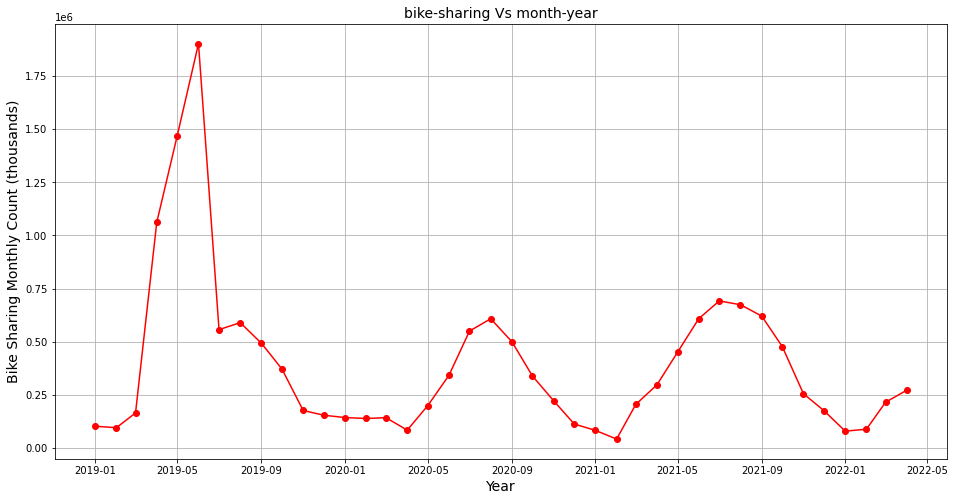

In [40]:
# plot monthly change over the years
plt.figure(figsize=[16,8])
plt.plot(month_year_dt['start_date'],month_year_dt['month_count'], color='red', marker='o')
plt.title('bike-sharing Vs month-year', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Bike Sharing Monthly Count (thousands)', fontsize=14)
plt.grid(True)
plt.show()

#### Findings
* The bike sharing volumne shows seasonality. There are not many bike sharing demand in winter but more demand in summer time.
* Before covid hits, in 2019, the bike sharing volumn is significant higher than those in covid years.
* The bike sharing significantly decreased in April of 2020 right after the Covid began, whereas it usually increases in April in other years.
* The bike sharing volumne is higher in 2021 compared with 2020.

In [41]:
 # convert the Start Time column to datetime  >>> then convert to month & year & day of week
month_year_dt['month'] = pd.to_datetime(month_year_dt['start_date']).dt.month
month_year_dt['year'] = pd.to_datetime(month_year_dt['start_date']).dt.year
month_year_dt

,start_date,month_count,month,year
4,2019-01-01,103272,1,2019
3,2019-02-01,96186,2,2019
7,2019-03-01,165611,3,2019
0,2019-04-01,1061240,4,2019
8,2019-05-01,1469832,5,2019
6,2019-06-01,1901580,6,2019
5,2019-07-01,557315,7,2019
1,2019-08-01,590184,8,2019
11,2019-09-01,493219,9,2019
10,2019-10-01,371786,10,2019


In [42]:
month_year_dt['start_date']

4    2019-01-01
3    2019-02-01
7    2019-03-01
0    2019-04-01
8    2019-05-01
6    2019-06-01
5    2019-07-01
1    2019-08-01
11   2019-09-01
10   2019-10-01
9    2019-11-01
2    2019-12-01
0    2020-01-01
1    2020-02-01
2    2020-03-01
3    2020-04-01
4    2020-05-01
5    2020-06-01
6    2020-07-01
7    2020-08-01
8    2020-09-01
9    2020-10-01
10   2020-11-01
11   2020-12-01
12   2021-01-01
13   2021-02-01
14   2021-03-01
15   2021-04-01
16   2021-05-01
17   2021-06-01
18   2021-07-01
19   2021-08-01
20   2021-09-01
21   2021-10-01
22   2021-11-01
23   2021-12-01
24   2022-01-01
25   2022-02-01
26   2022-03-01
27   2022-04-01
Name: start_date, dtype: datetime64[ns]

In [43]:
month_year_dt = month_year_dt.drop(['start_date'], axis=1)
month_year_dt

,month_count,month,year
4,103272,1,2019
3,96186,2,2019
7,165611,3,2019
0,1061240,4,2019
8,1469832,5,2019
6,1901580,6,2019
5,557315,7,2019
1,590184,8,2019
11,493219,9,2019
10,371786,10,2019


In [44]:
table = pd.pivot_table(month_year_dt, values='month_count', index=['year'],
                       columns=['month'], aggfunc=np.sum)
table

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2019,103272.0,96186.0,165611.0,1061240.0,1469832.0,1901580.0,557315.0,590184.0,493219.0,371786.0,177176.0,155092.0
2020,143884.0,139585.0,143417.0,84677.0,199953.0,342537.0,550425.0,608510.0,500390.0,339303.0,222789.0,113911.0
2021,83509.0,42996.0,205691.0,298207.0,450994.0,608778.0,692321.0,674409.0,621150.0,477972.0,255904.0,176371.0
2022,80128.0,89178.0,215983.0,272560.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Figure size 1152x576 with 0 Axes>

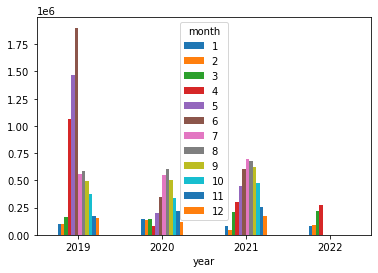

In [49]:
plt.figure(figsize=[16,8])
table.plot.bar(rot=0)
plt.show()

### Findings
* The bike sharing in April and March of this year is higher than the same month in 2020, 2021, which showing some recovery signals.

In [69]:
year_dt = month_year_dt.groupby('year').sum()
year_dt = year_dt.rename(columns={'month_count': 'year_count'}).reset_index().iloc[:3,:]
year_dt

,year,year_count,month
0,2019,7142493,78
1,2020,3389381,78
2,2021,4588302,78


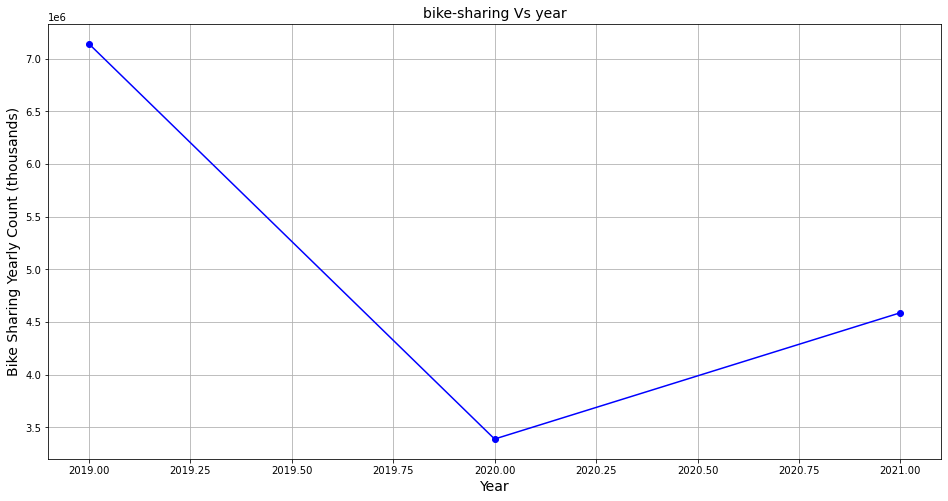

In [72]:
# plot yearly change over the years
plt.figure(figsize=[16,8])
plt.plot(year_dt['year'],year_dt['year_count'], color='blue', marker='o')
plt.title('bike-sharing Vs year', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Bike Sharing Yearly Count (thousands)', fontsize=14)
plt.grid(True)
plt.show()

In [78]:
# comb_df_20_21_22
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'month', 'year', 'dayofweek', 'dayofmonth',
       'duration_minutes', 'geometry', 'h3_index', 'lat', 'lng', 'start_date',
       'stated_at', 'strated_at'],
      dtype='object')

In [79]:
df.dtypes

ride_id                       object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
month                          int64
year                           int64
dayofweek                      int64
dayofmonth                     int64
duration_minutes             float64
geometry                    geometry
h3_index                      object
lat                          float64
lng                          float64
start_date            datetime64[ns]
stated_at             datetime64[ns]
strated_at            datetime64[ns]
dtype: object

In [80]:
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,dayofweek,dayofmonth,duration_minutes,geometry,h3_index,lat,lng,start_date,stated_at,strated_at
0,BD0A6FF6FFF9B921,electric_bike,2020-11-01 13:36:00,2020-11-01 13:45:40,Dearborn St & Erie St,110.0,St. Clair St & Erie St,211.0,41.894177,-87.629127,...,6,1,9.666667,POINT (-87.62338 41.89443),882664c1e1fffff,41.895400,-87.626394,2020-11-01,2020-11-01 13:36:00,2020-11-01 13:36:00
1,96A7A7A4BDE4F82D,electric_bike,2020-11-01 10:03:26,2020-11-01 10:14:45,Franklin St & Illinois St,672.0,Noble St & Milwaukee Ave,29.0,41.890959,-87.635343,...,6,1,11.316667,POINT (-87.66248 41.90067),882664caddfffff,41.898523,-87.660699,2020-11-01,2020-11-01 10:03:26,2020-11-01 10:03:26
2,C61526D06582BDC5,electric_bike,2020-11-01 00:34:05,2020-11-01 01:03:06,Lake Shore Dr & Monroe St,76.0,Federal St & Polk St,41.0,41.880983,-87.616754,...,6,1,29.016667,POINT (-87.62955 41.87205),882664c1a3fffff,41.867490,-87.630287,2020-11-01,2020-11-01 00:34:05,2020-11-01 00:34:05
3,E533E89C32080B9E,electric_bike,2020-11-01 00:45:16,2020-11-01 00:54:31,Leavitt St & Chicago Ave,659.0,Stave St & Armitage Ave,185.0,41.895499,-87.682013,...,6,1,9.250000,POINT (-87.69139 41.91774),882664ca13fffff,41.915594,-87.693078,2020-11-01,2020-11-01 00:45:16,2020-11-01 00:45:16
4,1C9F4EF18C168C60,electric_bike,2020-11-01 15:43:25,2020-11-01 16:16:52,Buckingham Fountain,2.0,Buckingham Fountain,2.0,41.876497,-87.620358,...,6,1,33.450000,POINT (-87.62034 41.87645),882664c1abfffff,41.873946,-87.623599,2020-11-01,2020-11-01 15:43:25,2020-11-01 15:43:25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635527,6AFB0C7D4D89F1B0,classic_bike,2021-05-01 15:28:11,2021-05-01 16:00:54,Sheridan Rd & Montrose Ave,TA1307000107,Michigan Ave & Oak St,13042,41.961670,-87.654640,...,5,1,32.716667,POINT (-87.62378 41.90096),882664c1e9fffff,41.901858,-87.619702,2021-05-01,2021-05-01 15:28:11,2021-05-01 15:28:11
8635528,187B36C368311E5B,electric_bike,2021-05-12 18:37:36,2021-05-12 18:44:13,Sheridan Rd & Montrose Ave,TA1307000107,Clark St & Grace St,TA1307000127,41.961521,-87.654596,...,2,12,6.616667,POINT (-87.65902 41.95098),882664c161fffff,41.947910,-87.659635,2021-05-01,2021-05-12 18:37:36,2021-05-12 18:37:36
8635529,43C517C9DD4CF4B2,docked_bike,2021-05-22 17:45:09,2021-05-22 18:30:00,Clark St & North Ave,13128,Kingsbury St & Kinzie St,KA1503000043,41.911974,-87.631942,...,5,22,44.850000,POINT (-87.63851 41.88918),882664c1e7fffff,41.888943,-87.633084,2021-05-01,2021-05-22 17:45:09,2021-05-22 17:45:09
8635530,745191CB9F21DE3C,classic_bike,2021-05-29 16:40:37,2021-05-29 17:22:37,Sheridan Rd & Montrose Ave,TA1307000107,Michigan Ave & Oak St,13042,41.961670,-87.654640,...,5,29,42.000000,POINT (-87.62378 41.90096),882664c1e9fffff,41.901858,-87.619702,2021-05-01,2021-05-29 16:40:37,2021-05-29 16:40:37


In [109]:
df_20_21_22 = df[['ride_id', 'started_at', 'ended_at', 'member_casual', 'month', 'year', 'dayofweek', 'dayofmonth', 'duration_minutes', 'start_station_name']]
df_20_21_22['started_at'] = pd.to_datetime(df_20_21_22['started_at'])
df_20_21_22

,ride_id,started_at,ended_at,member_casual,month,year,dayofweek,dayofmonth,duration_minutes,start_station_name
0,BD0A6FF6FFF9B921,2020-11-01 13:36:00,2020-11-01 13:45:40,casual,11,2020,6,1,9.666667,Dearborn St & Erie St
1,96A7A7A4BDE4F82D,2020-11-01 10:03:26,2020-11-01 10:14:45,casual,11,2020,6,1,11.316667,Franklin St & Illinois St
2,C61526D06582BDC5,2020-11-01 00:34:05,2020-11-01 01:03:06,casual,11,2020,6,1,29.016667,Lake Shore Dr & Monroe St
3,E533E89C32080B9E,2020-11-01 00:45:16,2020-11-01 00:54:31,casual,11,2020,6,1,9.250000,Leavitt St & Chicago Ave
4,1C9F4EF18C168C60,2020-11-01 15:43:25,2020-11-01 16:16:52,casual,11,2020,6,1,33.450000,Buckingham Fountain
...,...,...,...,...,...,...,...,...,...,...
8635527,6AFB0C7D4D89F1B0,2021-05-01 15:28:11,2021-05-01 16:00:54,member,5,2021,5,1,32.716667,Sheridan Rd & Montrose Ave
8635528,187B36C368311E5B,2021-05-12 18:37:36,2021-05-12 18:44:13,member,5,2021,2,12,6.616667,Sheridan Rd & Montrose Ave
8635529,43C517C9DD4CF4B2,2021-05-22 17:45:09,2021-05-22 18:30:00,casual,5,2021,5,22,44.850000,Clark St & North Ave
8635530,745191CB9F21DE3C,2021-05-29 16:40:37,2021-05-29 17:22:37,casual,5,2021,5,29,42.000000,Sheridan Rd & Montrose Ave


In [111]:
df_20_21_22
 # convert the Start Time column to datetime  >>> then convert to month & year & day of week
df_20_21_22['month'] = pd.to_datetime(df_20_21_22['started_at']).dt.month
df_20_21_22['year'] = pd.to_datetime(df_20_21_22['started_at']).dt.year
df_20_21_22['dayofweek'] = pd.to_datetime(df_20_21_22['started_at']).dt.weekday
df_20_21_22['dayofmonth'] = pd.to_datetime(df_20_21_22['started_at']).dt.day

df_20_21_22['started_at'] = pd.to_datetime(df_20_21_22['started_at'])
df_20_21_22['ended_at'] = pd.to_datetime(df_20_21_22['ended_at'])
df_20_21_22['duration_minutes'] = ((df_20_21_22['ended_at'] - df_20_21_22['started_at']).astype('timedelta64[s]'))/60
df_20_21_22
                

,ride_id,started_at,ended_at,member_casual,month,year,dayofweek,dayofmonth,duration_minutes,start_station_name,end_time
0,BD0A6FF6FFF9B921,2020-11-01 13:36:00,2020-11-01 13:45:40,casual,11,2020,6,1,9.666667,Dearborn St & Erie St,2020-11-01 13:45:40
1,96A7A7A4BDE4F82D,2020-11-01 10:03:26,2020-11-01 10:14:45,casual,11,2020,6,1,11.316667,Franklin St & Illinois St,2020-11-01 10:14:45
2,C61526D06582BDC5,2020-11-01 00:34:05,2020-11-01 01:03:06,casual,11,2020,6,1,29.016667,Lake Shore Dr & Monroe St,2020-11-01 01:03:06
3,E533E89C32080B9E,2020-11-01 00:45:16,2020-11-01 00:54:31,casual,11,2020,6,1,9.250000,Leavitt St & Chicago Ave,2020-11-01 00:54:31
4,1C9F4EF18C168C60,2020-11-01 15:43:25,2020-11-01 16:16:52,casual,11,2020,6,1,33.450000,Buckingham Fountain,2020-11-01 16:16:52
...,...,...,...,...,...,...,...,...,...,...,...
8635527,6AFB0C7D4D89F1B0,2021-05-01 15:28:11,2021-05-01 16:00:54,member,5,2021,5,1,32.716667,Sheridan Rd & Montrose Ave,2021-05-01 16:00:54
8635528,187B36C368311E5B,2021-05-12 18:37:36,2021-05-12 18:44:13,member,5,2021,2,12,6.616667,Sheridan Rd & Montrose Ave,2021-05-12 18:44:13
8635529,43C517C9DD4CF4B2,2021-05-22 17:45:09,2021-05-22 18:30:00,casual,5,2021,5,22,44.850000,Clark St & North Ave,2021-05-22 18:30:00
8635530,745191CB9F21DE3C,2021-05-29 16:40:37,2021-05-29 17:22:37,casual,5,2021,5,29,42.000000,Sheridan Rd & Montrose Ave,2021-05-29 17:22:37


In [75]:
comb_df_19

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,start_date
0,22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,446.0,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber,Male,1975.0,Apr-2019
1,22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,"1,048.0",317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber,Female,1984.0,Apr-2019
2,22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,252.0,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber,Male,1990.0,Apr-2019
3,22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,357.0,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,Subscriber,Male,1993.0,Apr-2019
4,22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,"1,007.0",202,Halsted St & 18th St,129,Blue Island Ave & 18th St,Subscriber,Male,1992.0,Apr-2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2709836,25962900,2019-12-31 23:56:13,2020-01-01 00:15:45,2196,"1,172.0",112,Green St & Randolph St,225,Halsted St & Dickens Ave,Subscriber,Male,1981.0,Dec-2019
2709837,25962901,2019-12-31 23:56:34,2020-01-01 00:22:08,4877,"1,533.0",90,Millennium Park,90,Millennium Park,Subscriber,Male,1992.0,Dec-2019
2709838,25962902,2019-12-31 23:57:05,2020-01-01 00:05:46,863,520.0,623,Michigan Ave & 8th St,52,Michigan Ave & Lake St,Subscriber,Male,1967.0,Dec-2019
2709839,25962903,2019-12-31 23:57:11,2020-01-01 00:05:45,2637,514.0,623,Michigan Ave & 8th St,52,Michigan Ave & Lake St,Subscriber,Female,1970.0,Dec-2019


In [94]:
comb_df_19.dtypes

trip_id                int64
start_time            object
end_time              object
bikeid                 int64
tripduration          object
from_station_id        int64
from_station_name     object
to_station_id          int64
to_station_name       object
usertype              object
gender                object
birthyear            float64
start_date            object
month                  int64
year                   int64
dayofweek              int64
dayofmonth             int64
dtype: object

In [104]:
 # convert the Start Time column to datetime  >>> then convert to month & year & day of week
comb_df_19['month'] = pd.to_datetime(comb_df_19['start_time']).dt.month
comb_df_19['year'] = pd.to_datetime(comb_df_19['start_time']).dt.year
comb_df_19['dayofweek'] = pd.to_datetime(comb_df_19['start_time']).dt.weekday
comb_df_19['dayofmonth'] = pd.to_datetime(comb_df_19['start_time']).dt.day

comb_df_19['start_time'] = pd.to_datetime(comb_df_19['start_time'])
comb_df_19['end_time'] = pd.to_datetime(comb_df_19['end_time'])
comb_df_19['duration_minutes'] = ((comb_df_19['end_time'] - comb_df_19['start_time']).astype('timedelta64[s]'))/60
comb_df_19
                

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,start_date,month,year,dayofweek,dayofmonth,duration_minutes
0,22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,446.0,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber,Male,1975.0,Apr-2019,4,2019,0,1,7.433333
1,22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,"1,048.0",317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber,Female,1984.0,Apr-2019,4,2019,0,1,17.466667
2,22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,252.0,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber,Male,1990.0,Apr-2019,4,2019,0,1,4.200000
3,22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,357.0,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,Subscriber,Male,1993.0,Apr-2019,4,2019,0,1,5.950000
4,22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,"1,007.0",202,Halsted St & 18th St,129,Blue Island Ave & 18th St,Subscriber,Male,1992.0,Apr-2019,4,2019,0,1,16.783333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2709836,25962900,2019-12-31 23:56:13,2020-01-01 00:15:45,2196,"1,172.0",112,Green St & Randolph St,225,Halsted St & Dickens Ave,Subscriber,Male,1981.0,Dec-2019,12,2019,1,31,19.533333
2709837,25962901,2019-12-31 23:56:34,2020-01-01 00:22:08,4877,"1,533.0",90,Millennium Park,90,Millennium Park,Subscriber,Male,1992.0,Dec-2019,12,2019,1,31,25.566667
2709838,25962902,2019-12-31 23:57:05,2020-01-01 00:05:46,863,520.0,623,Michigan Ave & 8th St,52,Michigan Ave & Lake St,Subscriber,Male,1967.0,Dec-2019,12,2019,1,31,8.683333
2709839,25962903,2019-12-31 23:57:11,2020-01-01 00:05:45,2637,514.0,623,Michigan Ave & 8th St,52,Michigan Ave & Lake St,Subscriber,Female,1970.0,Dec-2019,12,2019,1,31,8.566667


In [152]:
comb_df_19_duration = comb_df_19.groupby('year').mean()
comb_df_19_duration = comb_df_19_duration[['duration_minutes']].reset_index()
comb_df_19_duration

,year,duration_minutes
0,2019,23.218762


In [153]:
df_20_21_22_duration = df_20_21_22.groupby('year').mean()
df_20_21_22_duration = df_20_21_22_duration[['duration_minutes']].reset_index()
df_20_21_22_duration

,year,duration_minutes
0,2020,25.292197
1,2021,21.810628
2,2022,15.732152


In [156]:
# combine two dataframes as one 
frames = [comb_df_19_duration,df_20_21_22_duration]
duration_year_dt = pd.concat(frames).set_index('year')
duration_year_dt

,duration_minutes
year,
2019,23.218762
2020,25.292197
2021,21.810628
2022,15.732152


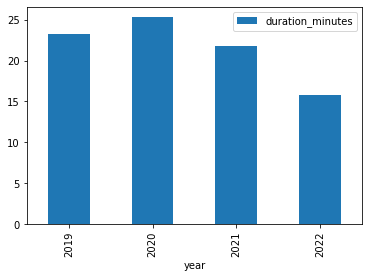

In [157]:
duration_year_dt.plot.bar()
plt.show()

In [145]:
comb_df_19_duration = comb_df_19.groupby(['year', 'month']).mean()
comb_df_19_duration = comb_df_19_duration[['duration_minutes']].reset_index()
comb_df_19_duration

month_year_duration = df_20_21_22.groupby(['year','month']).mean()
month_year_duration = month_year_duration[['duration_minutes']].reset_index()
month_year_duration

# combine two dataframes as one 
frames = [comb_df_19_duration, month_year_duration]
month_year_duration = pd.concat(frames)
month_year_duration

,year,month,duration_minutes
0,2019,1,17.061528
1,2019,2,17.029377
2,2019,3,16.815614
3,2019,4,20.248466
4,2019,5,22.155053
5,2019,6,23.140878
6,2019,7,30.094788
7,2019,8,32.278944
8,2019,9,23.961261
9,2019,10,21.812440


In [158]:
table = pd.pivot_table(month_year_duration, values='duration_minutes', index=['year'],
                       columns=['month'], aggfunc=np.sum)
table

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2019,17.061528,17.029377,16.815614,20.248466,22.155053,23.140878,30.094788,32.278944,23.961261,21.812440,18.197727,16.915154
2020,19.292028,23.384334,23.712213,35.585749,33.020710,33.243170,37.831988,29.319820,25.139429,20.100341,19.968968,-63.490162
2021,14.553328,21.262081,22.790592,24.026209,26.502797,26.321609,24.192475,21.152873,20.183739,17.672299,14.096203,14.226221
2022,12.957629,13.052485,16.970282,16.443442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Figure size 1152x576 with 0 Axes>

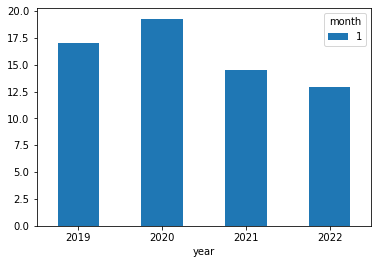

In [161]:
table_1 = table.iloc[:,:1]
plt.figure(figsize=[16,8])
table_1.plot.bar(rot=0)
plt.show()

<Figure size 1152x576 with 0 Axes>

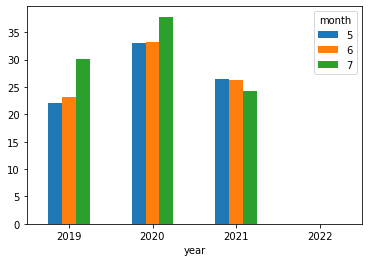

In [168]:
table_1 = table.iloc[:,4:7]
plt.figure(figsize=[16,8])
table_1.plot.bar(rot=0)
plt.show()

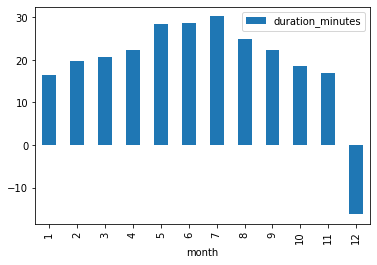

In [126]:
df_20_21_22_duration.plot.bar()
plt.show()

In [171]:
df_20_21_22.head()

,ride_id,started_at,ended_at,member_casual,month,year,dayofweek,dayofmonth,duration_minutes,start_station_name,end_time
0,BD0A6FF6FFF9B921,2020-11-01 13:36:00,2020-11-01 13:45:40,casual,11,2020,6,1,9.666667,Dearborn St & Erie St,2020-11-01 13:45:40
1,96A7A7A4BDE4F82D,2020-11-01 10:03:26,2020-11-01 10:14:45,casual,11,2020,6,1,11.316667,Franklin St & Illinois St,2020-11-01 10:14:45
2,C61526D06582BDC5,2020-11-01 00:34:05,2020-11-01 01:03:06,casual,11,2020,6,1,29.016667,Lake Shore Dr & Monroe St,2020-11-01 01:03:06
3,E533E89C32080B9E,2020-11-01 00:45:16,2020-11-01 00:54:31,casual,11,2020,6,1,9.250000,Leavitt St & Chicago Ave,2020-11-01 00:54:31
4,1C9F4EF18C168C60,2020-11-01 15:43:25,2020-11-01 16:16:52,casual,11,2020,6,1,33.450000,Buckingham Fountain,2020-11-01 16:16:52


In [181]:
comb_df_19_duration = comb_df_19.groupby(['from_station_name','year']).mean()
comb_df_19_duration = comb_df_19_duration[['duration_minutes']].reset_index()
comb_df_19_duration = comb_df_19_duration.rename(columns={'from_station_name': 'start_station_name'})
comb_df_19_duration

month_year_duration = df_20_21_22.groupby(['start_station_name','year']).mean()
month_year_duration = month_year_duration[['duration_minutes']].reset_index()
month_year_duration

# combine two dataframes as one 
frames = [comb_df_19_duration, month_year_duration]
station_year_duration = pd.concat(frames)
station_year_duration


,start_station_name,year,duration_minutes
0,2112 W Peterson Ave,2019,72.609924
1,63rd St Beach,2019,52.670582
2,900 W Harrison St,2019,12.692157
3,Aberdeen St & Jackson Blvd,2019,24.919082
4,Aberdeen St & Monroe St,2019,14.635286
...,...,...,...
2375,Yates Blvd & 75th St,2020,81.657832
2376,Yates Blvd & 75th St,2021,88.450000
2377,Yates Blvd & 75th St,2022,36.978378
2378,Yates Blvd & 93rd St,2021,137.000208


<AxesSubplot:xlabel='start_station_name'>

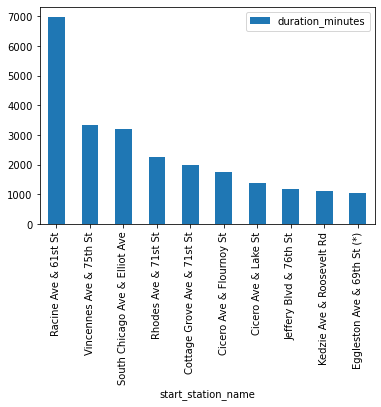

In [199]:
top_10_station_duration_2019 = station_year_duration[station_year_duration['year'] == 2019]
top_10_station_duration_2019 = top_10_station_duration_2019.sort_values(by='duration_minutes', ascending=False).iloc[:10].set_index('start_station_name').drop('year', axis=1)
top_10_station_duration_2019
top_10_station_duration_2019.plot.bar()

<AxesSubplot:xlabel='start_station_name'>

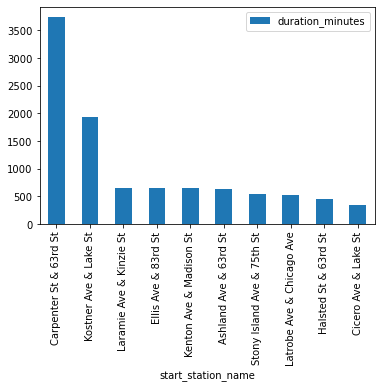

In [197]:
top_10_station_duration_2020 = station_year_duration[station_year_duration['year'] == 2020]
top_10_station_duration_2020 = top_10_station_duration_2020.sort_values(by='duration_minutes', ascending=False).iloc[:10].set_index('start_station_name').drop('year', axis=1)
top_10_station_duration_2020
top_10_station_duration_2020.plot.bar()

<AxesSubplot:xlabel='start_station_name'>

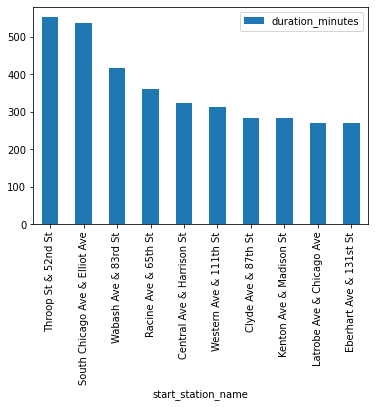

In [198]:
top_10_station_duration_2021 = station_year_duration[station_year_duration['year'] == 2021]
top_10_station_duration_2021 = top_10_station_duration_2021.sort_values(by='duration_minutes', ascending=False).iloc[:10].set_index('start_station_name').drop('year', axis=1)
top_10_station_duration_2021
top_10_station_duration_2021.plot.bar()

In [205]:
comb_df_19

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,start_date,month,year,dayofweek,dayofmonth,duration_minutes
0,22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,446.0,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber,Male,1975.0,Apr-2019,4,2019,0,1,7.433333
1,22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,"1,048.0",317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber,Female,1984.0,Apr-2019,4,2019,0,1,17.466667
2,22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,252.0,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber,Male,1990.0,Apr-2019,4,2019,0,1,4.200000
3,22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,357.0,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,Subscriber,Male,1993.0,Apr-2019,4,2019,0,1,5.950000
4,22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,"1,007.0",202,Halsted St & 18th St,129,Blue Island Ave & 18th St,Subscriber,Male,1992.0,Apr-2019,4,2019,0,1,16.783333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2709836,25962900,2019-12-31 23:56:13,2020-01-01 00:15:45,2196,"1,172.0",112,Green St & Randolph St,225,Halsted St & Dickens Ave,Subscriber,Male,1981.0,Dec-2019,12,2019,1,31,19.533333
2709837,25962901,2019-12-31 23:56:34,2020-01-01 00:22:08,4877,"1,533.0",90,Millennium Park,90,Millennium Park,Subscriber,Male,1992.0,Dec-2019,12,2019,1,31,25.566667
2709838,25962902,2019-12-31 23:57:05,2020-01-01 00:05:46,863,520.0,623,Michigan Ave & 8th St,52,Michigan Ave & Lake St,Subscriber,Male,1967.0,Dec-2019,12,2019,1,31,8.683333
2709839,25962903,2019-12-31 23:57:11,2020-01-01 00:05:45,2637,514.0,623,Michigan Ave & 8th St,52,Michigan Ave & Lake St,Subscriber,Female,1970.0,Dec-2019,12,2019,1,31,8.566667


In [206]:
col = top_10_station_duration_2019.columns
top_10_station_location = comb_df_19['from_station_name']
top_10_station_location

0                 Daley Center Plaza
1                Wood St & Taylor St
2          LaSalle St & Jackson Blvd
3           McClurg Ct & Illinois St
4               Halsted St & 18th St
                     ...            
2709836       Green St & Randolph St
2709837              Millennium Park
2709838        Michigan Ave & 8th St
2709839        Michigan Ave & 8th St
2709840       Broadway & Sheridan Rd
Name: from_station_name, Length: 7142493, dtype: object

In [243]:
list = top_10_station_duration_2020.reset_index()['start_station_name'].tolist()
df_20 = df[['start_station_name', 'h3_index', 'lat', 'lng']]
df_20 = df_20.loc[df_20['start_station_name'].isin(list)].drop_duplicates()
df_20.to_csv("top_10_loc_20.csv", index=False,mode='w')
df_20

,start_station_name,h3_index,lat,lng
295,Stony Island Ave & 75th St,882664ccc1fffff,41.749679,-87.577414
921,Stony Island Ave & 75th St,882664cea5fffff,41.771105,-87.580180
5614,Ashland Ave & 63rd St,882664cc05fffff,41.782774,-87.630530
6919,Stony Island Ave & 75th St,882664cea3fffff,41.762565,-87.564054
6992,Halsted St & 63rd St,882664cd5bfffff,41.792346,-87.658081
...,...,...,...,...
8428966,Kenton Ave & Madison St,882664caa3fffff,41.874756,-87.710285
8487061,Laramie Ave & Kinzie St,882664c1e3fffff,41.887901,-87.621651
8544247,Laramie Ave & Kinzie St,882664ca6dfffff,41.962654,-87.744539
8591387,Stony Island Ave & 75th St,882664cc67fffff,41.791306,-87.646672


In [248]:
list = top_10_station_duration_2021.reset_index()['start_station_name'].tolist()
list
df_21 = df[['start_station_name', 'h3_index', 'lat', 'lng']]
df_21 = df_21.loc[df_21['start_station_name'].isin(list)].drop_duplicates()
df_21.to_csv("top_10_loc_21.csv", index=False,mode='w')
df_21

,start_station_name,h3_index,lat,lng
6361,Wabash Ave & 83rd St,882664cce1fffff,41.745328,-87.606885
8966,Central Ave & Harrison St,882664c83bfffff,41.872421,-87.762670
9374,Western Ave & 111th St,8826645753fffff,41.688382,-87.678241
28126,Central Ave & Harrison St,882664caa5fffff,41.883284,-87.726471
29858,Clyde Ave & 87th St,8826641b35fffff,41.702642,-87.526337
...,...,...,...,...
8389988,Western Ave & 111th St,882664cea1fffff,41.770057,-87.568776
8428966,Kenton Ave & Madison St,882664caa3fffff,41.874756,-87.710285
8471858,South Chicago Ave & Elliot Ave,882664cccbfffff,41.748631,-87.566015
8480428,Central Ave & Harrison St,882664caa1fffff,41.882251,-87.715040
